In [11]:
from tkinter import font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from plotly import tools 
import plotly.graph_objs as go
import plotly.offline as pof

In [2]:
df = pd.read_csv("csv/100Hz_normal_2022_03_11_14_34_38.csv")
print(df)

        channel_0
0             -12
1              36
2              51
3             -49
4             -93
...           ...
500875         39
500876        -24
500877         74
500878        212
500879        115

[500880 rows x 1 columns]


In [3]:
# df.drop(["sequence"], axis = 1, inplace = True)

In [4]:
# print(len(data.values.T[0]))
col_count = len(df)
# print(col_count)

col_countList = []
for i in range(col_count):
    col_countList.append(i)

print(len(col_countList))

500880



[15065484731862.594, 9119418161277.797, 4567372508588.277, 3189477764488.735, 1998034725276.462, 1384035185250.811, 962989469951.2891, 770959945600.8962, 613830215425.6416]


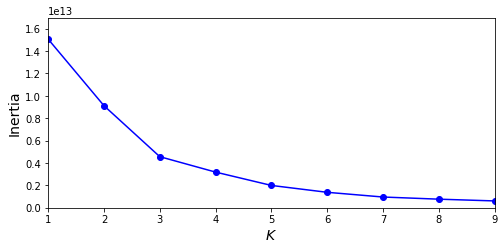

In [5]:
# 測試 K = 1~9，選擇迅速下降轉為平緩的點
kmeans_list = [KMeans(n_clusters=k).fit(df)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

print("\f")
print(inertias)

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9, 0, 17000000000000])
plt.show()

In [6]:
# 分幾群
k = 3

# 單跑一次，並評估平均值，且預測
kmeansModel = KMeans(n_clusters=k)
clusters_pred = kmeansModel.fit_predict(df)

# 每個點到其他叢集的質心的距離之和
print(kmeansModel.inertia_)

# 特徵的中心點
print(kmeansModel.cluster_centers_)

y_means = kmeansModel.predict(df)

print(y_means)

4567362030368.369
[[   -42.18015144]
 [-13615.4858347 ]
 [ 11652.42257419]]
[0 0 0 ... 0 0 0]
